In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

In [2]:
train = pd.read_csv('C:/Users/DAEUN/Downloads/타이타닉/train.csv')
test = pd.read_csv('C:/Users/DAEUN/Downloads/타이타닉/test.csv')
submission = pd.read_csv('C:/Users/DAEUN/Downloads/타이타닉/submission.csv')

# EDA

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

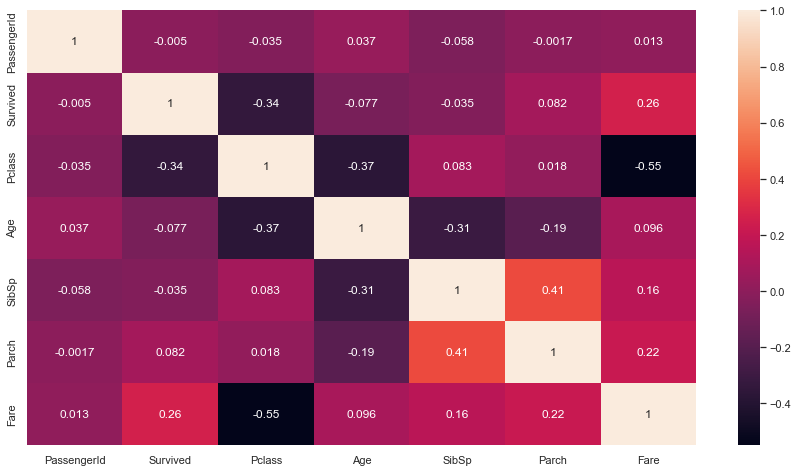

In [7]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(train.corr(), annot = True)

In [29]:
train.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,round_age
Sex,,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,27.662835
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,30.596026


In [30]:
train.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare,round_age
Pclass,,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687,38.440860
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183,29.364162
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550,24.929577


In [47]:
train['round_age'] = 0
pd.set_option('mode.chained_assignment',  None)
for i in range(len(train)):
    train['round_age'][i] = round(train['Age'][i], -1)
    
train.groupby('round_age').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
round_age,,,,,,,
0.0,410.954545,0.704545,2.568182,2.503864,1.704545,1.363636,31.528030
10.0,440.235294,0.411765,2.705882,10.102941,1.970588,1.264706,31.932724
20.0,444.780269,0.354260,2.461883,20.706278,0.390135,0.313901,30.323057
30.0,456.016854,0.404494,2.342697,29.828652,0.320225,0.185393,24.654328
40.0,440.174242,0.424242,2.000000,39.306818,0.363636,0.560606,49.744948
50.0,503.950820,0.409836,1.606557,49.704918,0.426230,0.262295,44.399390
60.0,423.323529,0.352941,1.470588,59.750000,0.147059,0.323529,48.589579
70.0,430.428571,0.000000,1.857143,70.357143,0.142857,0.142857,27.383343
80.0,631.000000,1.000000,1.000000,80.000000,0.000000,0.000000,30.000000


In [67]:
train['round_age'].value_counts()

20.0    223
30.0    178
40.0    132
50.0     61
0.0      44
10.0     34
60.0     34
70.0      7
80.0      1
Name: round_age, dtype: int64

In [57]:
print(train.loc[(train['round_age'] == 0.0)])

     PassengerId  Survived  Pclass                                      Name  \
7              8         0       3            Palsson, Master. Gosta Leonard   
10            11         1       3           Sandstrom, Miss. Marguerite Rut   
16            17         0       3                      Rice, Master. Eugene   
43            44         1       2  Laroche, Miss. Simonne Marie Anne Andree   
58            59         1       2              West, Miss. Constance Mirium   
63            64         0       3                     Skoog, Master. Harald   
78            79         1       2             Caldwell, Master. Alden Gates   
119          120         0       3         Andersson, Miss. Ellis Anna Maria   
164          165         0       3              Panula, Master. Eino Viljami   
171          172         0       3                      Rice, Master. Arthur   
172          173         1       3              Johnson, Miss. Eleanor Ileen   
183          184         1       2      

In [73]:
train.groupby('Embarked').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,round_age
Embarked,,,,,,,,
C,445.357143,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144,30.769231
Q,417.896104,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030,27.857143
S,449.527950,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812,29.241877


In [72]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [77]:
train.groupby('Cabin').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,round_age
Cabin,,,,,,,,
A10,584.0,0.0,1.0,36.00,0.0,0.00,40.125000,40.000000
A14,476.0,0.0,1.0,NaN,0.0,0.00,52.000000,NaN
A16,557.0,1.0,1.0,48.00,1.0,0.00,39.600000,50.000000
A19,285.0,0.0,1.0,NaN,0.0,0.00,26.000000,NaN
A20,600.0,1.0,1.0,49.00,1.0,0.00,56.929200,50.000000
...,...,...,...,...,...,...,...,...
F33,310.0,1.0,2.0,29.00,0.0,0.00,11.333333,26.666667
F38,777.0,0.0,3.0,NaN,0.0,0.00,7.750000,NaN
F4,401.5,1.0,2.0,2.50,2.0,1.00,39.000000,0.000000


In [78]:
train['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [99]:
# train['Cabin'].fillna(0)
# print(train['Cabin'])
# train['cabin_alphabet'] = ""
# pd.set_option('mode.chained_assignment',  None)
# for i in range(len(train)):
#     if train['Cabin'][i] != 'nan':
#         print(train['Cabin'][i])
#     #train['cabin_alphabet'][i] = train['Cabin'][i][0]
    
# train.groupby('cabin_alphabet').mean()

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object
nan
C85
nan
C123
nan
nan
E46
nan
nan
nan
G6
C103
nan
nan
nan
nan
nan
nan
nan
nan
nan
D56
nan
A6
nan
nan
nan
C23 C25 C27
nan
nan
nan
B78
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
D33
nan
B30
C52
nan
nan
nan
nan
nan
B28
C83
nan
nan
nan
F33
nan
nan
nan
nan
nan
nan
nan
nan
F G73
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
C23 C25 C27
nan
nan
nan
E31
nan
nan
nan
A5
D10 D12
nan
nan
nan
nan
D26
nan
nan
nan
nan
nan
nan
nan
C110
nan
nan
nan
nan
nan
nan
nan
B58 B60
nan
nan
nan
nan
E101
D26
nan
nan
nan
F E69
nan
nan
nan
nan
nan
nan
nan
D47
C123
nan
B86
nan
nan
nan
nan
nan
nan
nan
nan
F2
nan
nan
C2
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
E33
nan
nan
nan
B19
nan
nan
nan
A7
nan
nan
C49
nan
nan
nan
nan
nan
F4
nan
A32
nan
nan
nan
nan
nan
nan
nan
F2
B4
B80
nan
nan
nan
nan
nan


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,round_age
cabin_alphabet,,,,,,,,
,446.0,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,29.52381


* 수치형 데이터 분석 <br>
Survived와 상관관계가 높은 항목 : Pclass, Fare <br>

* 범주형 데이터 분석 <br> 
Sex : 여성이 남성보다 평균 생존 가능성이 높음 <br>
Pclass : 좋은 좌석일수록 생존 가능성이 높음 <br>
round_age : 0~10세의 생존 가능성 높음, 70세 이상의 생존 가능성 낮음 <br>
Embarked : C에서 탑승한 사람들의 생존률이 높음 (Pclss와 관련 있는 것 같기도?)

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,round_age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,40.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,30.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,40.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,40.0


In [21]:
# 평균 생존률
print(sum(train['Survived'])/len(train))

0.3838383838383838


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

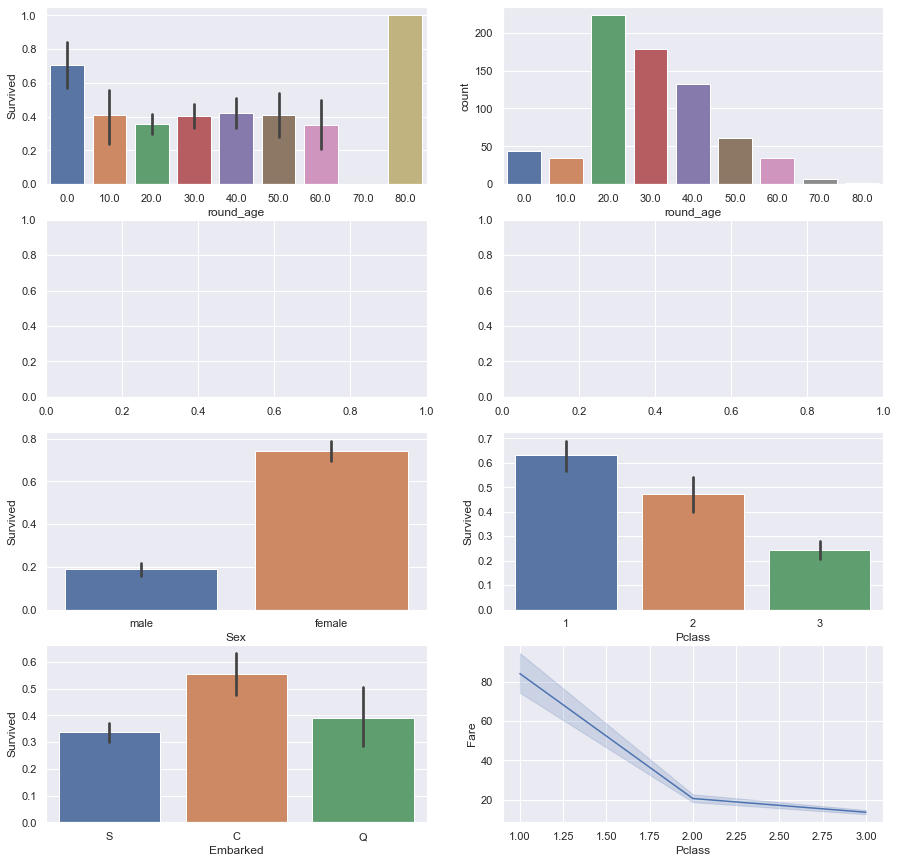

In [104]:
import seaborn as sns

sns.set(rc = {'figure.figsize':(15,15)})
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows = 4, ncols = 2)

sns.barplot(data=train, x = 'round_age', y='Survived', ax=ax1)
sns.countplot(data=train, x = 'round_age', ax=ax2)
# sns.lineplot(data=train, x = 'Age', y='Survived', ax=ax3)
#sns.barplot(data=train, x = 'Ticket', y='Survived', ax=ax4)
sns.barplot(data=train, x = 'Sex', y='Survived', ax=ax5)
sns.barplot(data=train, x = 'Pclass', y='Survived', ax=ax6)
sns.barplot(data=train, x = 'Embarked', y='Survived', ax=ax7)
sns.lineplot(data=train, x = 'Pclass', y='Fare', ax=ax8)
